In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [16]:
# Load log results
with open("rs_log.json", "r") as f:
    result_dict = json.load(f)

def per_err_fixed(acc, orig_acc):
    err = 1 - acc
    delta_acc = acc - orig_acc
    return delta_acc / err

mean_log, std_log = {}, {}
for method_name, metric_arr in result_dict.items():
    if method_name == "None":
        continue
    mean_log[method_name] = per_err_fixed(np.array(metric_arr), result_dict["None"]["usps_test"]).mean(axis=0)
    std_log[method_name] = per_err_fixed(np.array(metric_arr), result_dict["None"]["usps_test"]).std(axis=0)
mean_log, std_log

({'KFOT': array([-0.04223905, -0.02841099,  0.05017914,  0.02255029,  0.05847649,
          0.05820899,  0.07691426,  0.06221579,  0.05959129,  0.06032247,
          0.0662746 ,  0.05910204,  0.06409796,  0.06311207,  0.05274143,
          0.06810834,  0.07153858,  0.06123265,  0.05990795,  0.06107089]),
  'FOT': array([-0.14990363, -0.03058027, -0.02895642,  0.02052593,  0.04455755,
          0.01429071,  0.02623037,  0.02347631,  0.02017497,  0.03171327,
          0.02545456,  0.03221752,  0.04341567,  0.05100661,  0.05554883,
          0.04749489,  0.04431598,  0.04571721,  0.03914483,  0.04392484]),
  'LOT': array([-0.15331176, -0.03490648, -0.03328289,  0.01574104,  0.03459105,
          0.0048888 ,  0.0166072 ,  0.01390754,  0.00133067,  0.01245455,
          0.00642961,  0.01294214,  0.02372323,  0.03102913,  0.03539864,
          0.02764392,  0.02458475,  0.02593077,  0.01960986,  0.02421548]),
  'OT': array([-0.24676754, -0.15679702, -0.15525656, -0.12316745, -0.10269208,
    

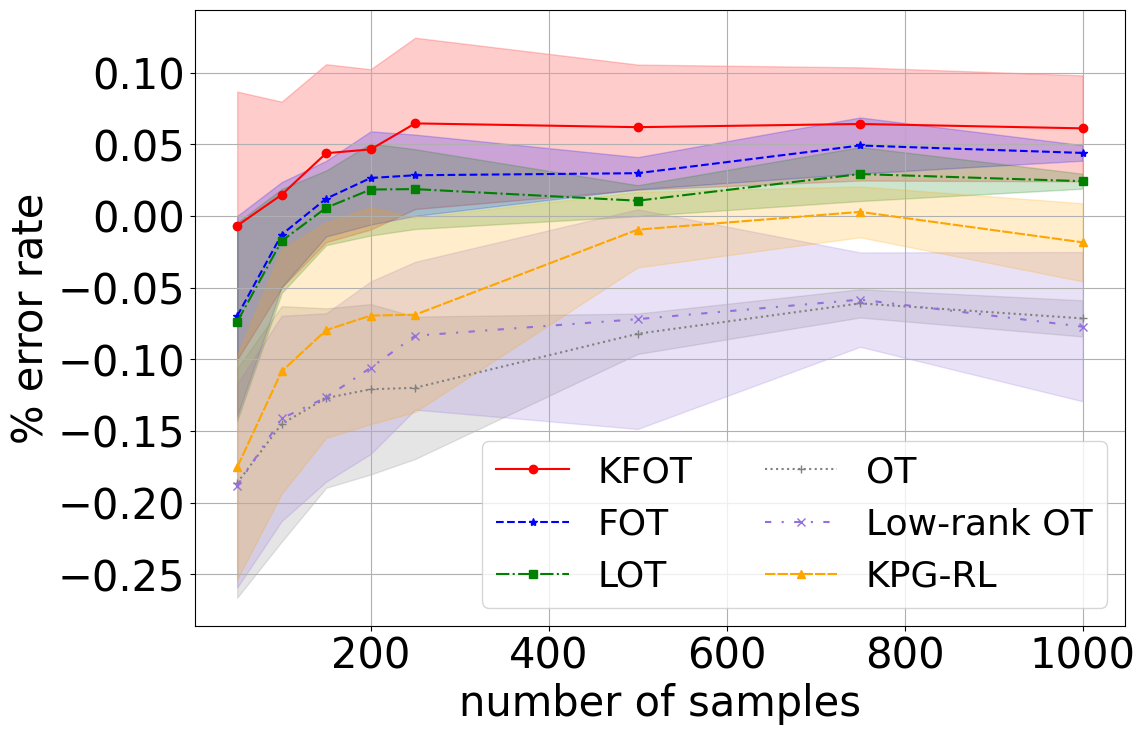

In [17]:
def mae(arr, window):
    arr = list(arr[:-1]) + [arr[-1] for _ in range(window)]
    return np.convolve(arr, np.ones(window), "valid") / window

# Selected indices
indices = [0, 1, 2, 3, 4, 9, 14, 19]

# Define styles
colors = {"KFOT": "red", "FOT": "blue", "LOT": "green", "OT": "gray", "Low-rank OT": "mediumpurple", "KPG-RL": "orange"}
markers = {"KFOT": "o", "FOT": "*", "LOT": "s", "OT": "+", "Low-rank OT": "x", "KPG-RL": "^"}
linestyles = {"KFOT": "-", "FOT": "--", "LOT": "-.", "OT": ":", "Low-rank OT": (0, (3, 5, 1, 5)), "KPG-RL": (0, (5, 1))}
window = 3
x = np.array(rs_log["random_sampling"]["1"]["KFOT"]["samples"])[indices]

plt.figure(figsize=(12, 8))

# Plot each line with its ± std fill
for key in mean_log.keys():
    mean = mean_log[key]
    std = std_log[key]
    
    # Define style
    color = colors.get(key, np.random.rand(3,))  # Default random color
    marker = markers.get(key, "x")  # Default marker
    linestyle = linestyles.get(key, "-")  # Default linestyle

    # Preprocess mean, std
    mae_mean = mae(mean, window)[indices]
    mae_std = mae(std, window)[indices]
    
    # Plot mean with fill_between
    plt.plot(x, mae_mean, label=key, color=color, marker=marker, linestyle=linestyle)
    plt.fill_between(x, mae_mean - mae_std, mae_mean + mae_std, color=color, alpha=0.2)

plt.xlabel("number of samples", fontsize=30)
plt.ylabel("% error rate", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=26, ncol=2)
plt.grid(True)
plt.savefig("robust_sampling.png", dpi=500)
plt.show()